## Session  5- Missing Value Imputation and Outlier Analysis

### Part 1 -  Missing Value imputation

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Follow these:

data = {2,3,5,1,NA,5,NA}
<br/>
<br/>
1) Repalce the missing values by 0<br/><br/>
It makes the data to skew towards zero.<br/>
(16+0+0}/7 = 2.28 ->mean is skewed towards zero.<br/>
Not recommended.
<br/>
<br/>
2) Ignore the missing value:

mean=16/5 = 3.2
For more than one variable, this may lead us to a(massive) loss of information.<br/>
Deleting observations may also make the data bias-> Random samples no longer reamains random.<br/>
<br/>
3) Replace by mean/median:
mean = 3.2 (Ignore the missing values)<br/>
Replace all the missing values by mean.(if its skewed then its problem).<br/>
Skewed data--> symmertric data(through log transforamtion<br/>
after this we can impute the missing value by mean(log(data))<br/>
then transform log(data) back to data<br/>
<br/>

4) Replace by mode if varaible is categorical:<br/>
Mode: highest frequency<br/>
The probability of the variable is high change of occuring we take mode, and impute the missing value with mode.<br/>
If its bimodal or multimodal, use local mode instead of global mode.


In [2]:
%pwd

'C:\\Users\\Goutham-ROG\\Documents\\1-Codes\\Python - codes\\IML(Numpy)\\Class exercises'

In [15]:
#Loading the data
import os
os.chdir(r"C:\\Users\\Goutham-ROG\\Documents\\1-Codes\\Python - codes\\IML(Numpy)\\Class exercises")

fram = pd.read_csv("S5_framingham.csv")

In [13]:
fram.shape

(4240, 16)

In [4]:
fram.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
#description of the data
fram.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


By seeing the about data, the count is not macthing: 4135 for eduaction whereas for age:4240<br/>
This tells us that somevalues are missing

#### 1. The isnul() method

In [6]:
#returns df of true - if the datapoint is missing, else false
fram.isnull().head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
type(fram.isnull())

pandas.core.frame.DataFrame

In [8]:
#Getting the number of missing values
missing = fram.isnull().sum()
missing

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
type(missing) #since it is series we can plot

pandas.core.series.Series

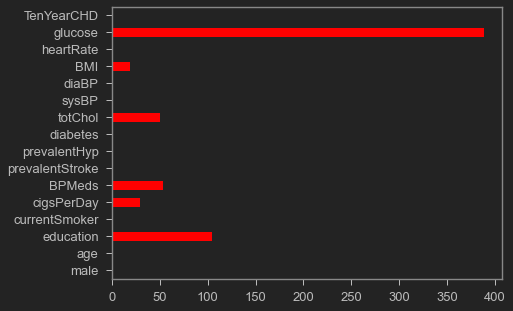

In [10]:
#Plotting the missing value information
missing.plot(kind='barh',figsize=(7,5), color='Red', fontsize=13)
plt.show()

In [11]:
#Getting the percentage of missing values
round(missing/len(fram)*100,3)

male               0.000
age                0.000
education          2.476
currentSmoker      0.000
cigsPerDay         0.684
BPMeds             1.250
prevalentStroke    0.000
prevalentHyp       0.000
diabetes           0.000
totChol            1.179
sysBP              0.000
diaBP              0.000
BMI                0.448
heartRate          0.024
glucose            9.151
TenYearCHD         0.000
dtype: float64

In [12]:
#Only the variables that contains the missing values
x = round(missing/len(fram)*100,3)
x[x>0]

education     2.476
cigsPerDay    0.684
BPMeds        1.250
totChol       1.179
BMI           0.448
heartRate     0.024
glucose       9.151
dtype: float64

#### 2. Complete Case Analysis
Rows containg missing values will be dropped entirely.

In [6]:
#Complete case considering all the variables
fram2 = fram.dropna()

In [16]:
fram2.shape

(3658, 16)

In [22]:
fram.shape

(4240, 16)

In [23]:
4240-3658

582

In [17]:
sum(fram.isnull().sum())

645

In [21]:
#There are 645 missing values in the dataset

#no. of datpoints deleted 
582*16 - 645

#instead of deleting 645 we have deleted 8667 datapoints
#this is what happens when u use complete cases.

8667

In [7]:
#Complete case considering a subset of variables
fram3 = fram.dropna(subset=["totChol","BMI","glucose"])

In [25]:
fram3.shape

(3828, 16)

In [26]:
fram.shape

(4240, 16)

In [27]:
4240-3828 #only fewer no. of observations got deleted.

412

In [28]:
fram3.isnull().sum()

male                0
age                 0
education          95
currentSmoker       0
cigsPerDay         25
BPMeds             51
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

#### 3. Mean or Median Imputation

In [8]:
#Making a copy of the data
fram_cp = fram.copy()

In [31]:
#Mean of all the variables
fram_cp.mean()

male                 0.429245
age                 49.580189
education            1.979444
currentSmoker        0.494104
cigsPerDay           9.005937
BPMeds               0.029615
prevalentStroke      0.005896
prevalentHyp         0.310613
diabetes             0.025708
totChol            236.699523
sysBP              132.354599
diaBP               82.897759
BMI                 25.800801
heartRate           75.878981
glucose             81.963655
TenYearCHD           0.151887
dtype: float64

In [32]:
#Imputing the missing values in the variable age using the mean
#Mean of totchol
fram_cp.totChol.mean()

236.69952267303103

In [33]:
np.sum(fram_cp.totChol.isnull())

50

In [9]:
fram_cp.totChol[fram_cp.totChol.isnull()]

42     NaN
154    NaN
247    NaN
429    NaN
567    NaN
577    NaN
609    NaN
673    NaN
822    NaN
834    NaN
871    NaN
951    NaN
1105   NaN
1122   NaN
1317   NaN
1354   NaN
1359   NaN
1448   NaN
1575   NaN
1744   NaN
1747   NaN
1785   NaN
1879   NaN
1940   NaN
2003   NaN
2008   NaN
2079   NaN
2209   NaN
2263   NaN
2340   NaN
2341   NaN
2417   NaN
2583   NaN
2589   NaN
2612   NaN
2805   NaN
2872   NaN
2902   NaN
3110   NaN
3111   NaN
3149   NaN
3285   NaN
3576   NaN
3607   NaN
3630   NaN
3660   NaN
3960   NaN
3961   NaN
3988   NaN
4185   NaN
Name: totChol, dtype: float64

In [10]:
#Imputing the missing values in the variable age using the mean
#Mean of totchol - ignore the warning
fram_cp.totChol[fram_cp.totChol.isnull()] = fram_cp.totChol.mean()

<ipython-input-10-7a285a6b1419>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
fram_cp.totChol.isnull().sum() #all the missing values has been replaced by mean

0

In [ ]:
#Re-checking the mean of the variable
#intital mean was 236.69952267303103//cell 32
fram.totChol.mean()

In [21]:
#Impute the missing values of the variable BMI with median (Do Yourself)
fram_cp.BMI.isnull().sum() #-19 values have to be imputed.

19

In [22]:
fram_cp.BMI.mean()#mean

25.800800758114182

In [26]:
fram_cp.BMI[fram_cp.BMI.isnull()]=fram_cp.BMI.mean()#imputation by mean

<ipython-input-26-236a0f85b617>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
#checking
fram_cp.BMI.isnull().sum()

0

#### 4. Choosing Mean Imputation Vs Median Imputation

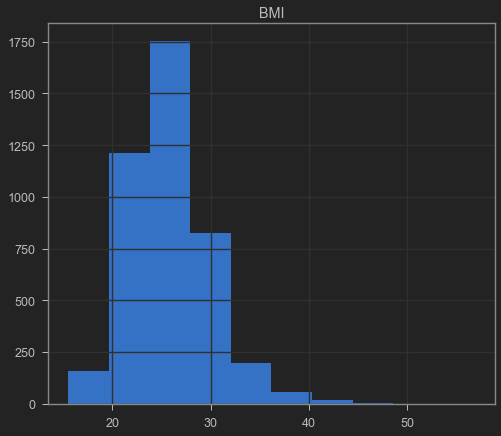

<ipython-input-35-936adff37918>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



25.4

In [35]:
#Check the distribution of the variable - If highly skewed go for median
fram_cp2 = fram.copy()
fram_cp2.hist(column = 'BMI') #it is skewed right, so median imputaion is better.
plt.show()

fram_cp2.BMI[fram_cp2.BMI.isnull()] = fram_cp2.BMI.median()
fram_cp2.BMI.median()

In [36]:
#recheck
fram_cp2.BMI.isnull().sum()

0

In [43]:
#Taking the log transformation of the variable
fram_cp2['log_BMI']= np.log(fram_cp2['BMI'])
fram_cp2.shape

(4240, 17)

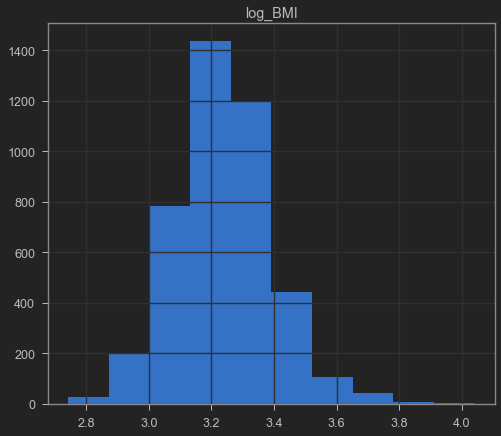

In [40]:
#Histogram of the log transformed variable
fram_cp2.hist(column='log_BMI')
plt.show()#normal dist

In [44]:
#Dropping logBMI
fram_cp2.drop('log_BMI',axis=1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


#### 5. Imputation for Categorical Variable

In [44]:
#Mode imputation
pd.crosstab(fram_cp.education, columns="Counts")/(4240-105)*100

col_0,Counts
education,
1.0,44.135429
2.0,30.302297
3.0,16.662636
4.0,11.438936


In [41]:
#Impute the missing values by the most frequent value
fram_cp["education"][fram_cp["education"].isnull()] = 1 #1 bcoz its the mode of the distribution

<ipython-input-41-78c264b38337>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fram_cp["education"][fram_cp["education"].isnull()] = 1


In [ ]:
#similar to above code
#fram_cp.education[fram_cp.education.isnull()] = 1

In [45]:
pd.crosstab(fram_cp.education,columns="Counts")/4240*100

col_0,Counts
education,
1.0,43.042453
2.0,29.551887
3.0,16.250000
4.0,11.155660


The problem with mode imputation is it increases the probability of the occurence<br/>


#### Home-Work

1.Try to replace missing values of the totalchol, without jus imputing by the mean. Do something tht makes sense.

2.find the no. of outliers present in totalchol
abv and below the lower bench mark

3.Repalce the outliers of the variable totalchol with by the upper benchmark and lower benchmark respectively.(This techinque is called WINSORIZATION)

234.0

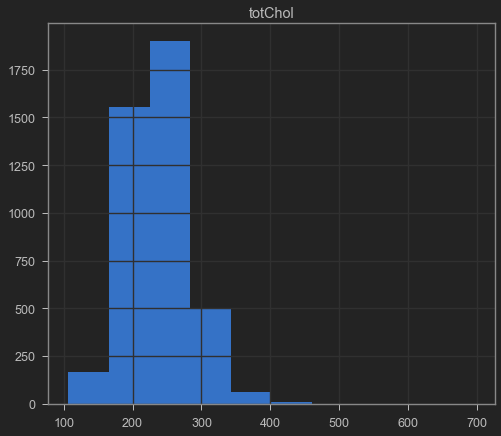

In [50]:
#1.Try to replace missing values of the totalchol, without jus imputing by the mean. Do something tht makes sense.
#lets look at the distribution
fram_copy = fram.copy()
fram_copy.columns
fram_copy.hist(column= 'totChol') # its right skewed
#so medain imputaion is better than mean
fram_copy[fram_copy.totChol.isnull()]=fram_copy.totChol.median()
fram_copy.totChol.median()

### Part B - Outlier Analysis

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [73]:
#2.find the no. of outliers present in totalchol abv and below the lower bench mark
import numpy as np
fram_cp3 =fram.copy()
t = fram_cp3['totChol']
Q1 = t.quantile(0.25) 
Q3 = t.quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)


dict(t[(t < lower) | (t > upper)])


{194: 464.0,
 259: 352.0,
 333: 368.0,
 533: 370.0,
 543: 439.0,
 617: 398.0,
 670: 355.0,
 920: 353.0,
 926: 360.0,
 998: 372.0,
 1103: 352.0,
 1111: 600.0,
 1150: 392.0,
 1389: 358.0,
 1447: 391.0,
 1544: 410.0,
 1610: 356.0,
 1624: 107.0,
 1691: 372.0,
 1710: 366.0,
 1870: 365.0,
 1932: 362.0,
 1937: 410.0,
 2014: 351.0,
 2024: 390.0,
 2206: 405.0,
 2208: 359.0,
 2275: 350.0,
 2349: 380.0,
 2363: 355.0,
 2368: 390.0,
 2488: 371.0,
 2525: 113.0,
 2575: 350.0,
 2602: 354.0,
 2607: 382.0,
 2671: 364.0,
 2797: 367.0,
 2972: 352.0,
 2985: 432.0,
 3056: 351.0,
 3160: 696.0,
 3165: 363.0,
 3394: 382.0,
 3418: 361.0,
 3474: 453.0,
 3532: 352.0,
 3571: 366.0,
 3806: 410.0,
 3810: 350.0,
 3816: 391.0,
 3844: 358.0,
 3916: 373.0,
 4001: 385.0,
 4003: 366.0,
 4066: 119.0}

In [79]:
#checking outliers in dtale
import dtale
dtale.show(fram_cp3, ignore_duplicate=True)
#perfect

In [75]:
#3 Winsoration
import scipy.stats
scipy.stats.mstats.winsorize(fram_cp3['totChol'], limits=[0.05,0.95]) # replacing outliers with upperbound and lower bound
#It didnt repalce the values??!!

masked_array(data=[170., 170., 170., ..., 170., 170., 170.],
             mask=False,
       fill_value=1e+20)

In [76]:
fram_cp3.totChol

0       195.0
1       250.0
2       245.0
3       225.0
4       285.0
        ...  
4235    248.0
4236    210.0
4237    269.0
4238    185.0
4239    196.0
Name: totChol, Length: 4240, dtype: float64